# CMU Book Summary Dataset

## Extracting the data

In [29]:
# Imports
import pandas as pd

In [30]:
df=pd.read_csv('/content/ds_beforeduplication.csv')

In [31]:
df

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
1,6,A Wizard of Earthsea,Children's literature,"Ged is a young boy on Gont, one of the larger..."
2,8,Blade Runner 3: Replicant Night,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
3,9,Blade Runner 2: The Edge of Human,Science Fiction,Beginning several months after the events in ...
4,21,Children of Dune,Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...
8794,16541,Nevermore: The Final Maximum Ride Adventure,Young adult literature,The prologue is Angel's vision of Max's death...
8795,16542,The Bourne Imperative,Thriller,:For a more detailed background of the main c...
8796,16551,Remote Control,Thriller,The series follows the character of Nick Ston...
8797,16555,Transfer of Power,Thriller,The reader first meets Rapp while he is doing...


In [32]:
df.Genres.value_counts()

fiction                   1615
Children's literature     1152
Science Fiction            999
Novel                      925
Mystery                    734
historical                 727
Fantasy                    624
Thriller                   568
Young adult literature     321
comedy                     174
autobiography              170
Non-fiction                166
Spy fiction                112
Horror                      88
Romance novel               68
Adventure novel             60
Picture book                49
Memoir                      43
Biography                   39
Techno-thriller             37
Short story                 36
Literary fiction            27
Philosophy                  23
Urban fantasy               22
Sword and sorcery           20
Name: Genres, dtype: int64

## Data Analysis

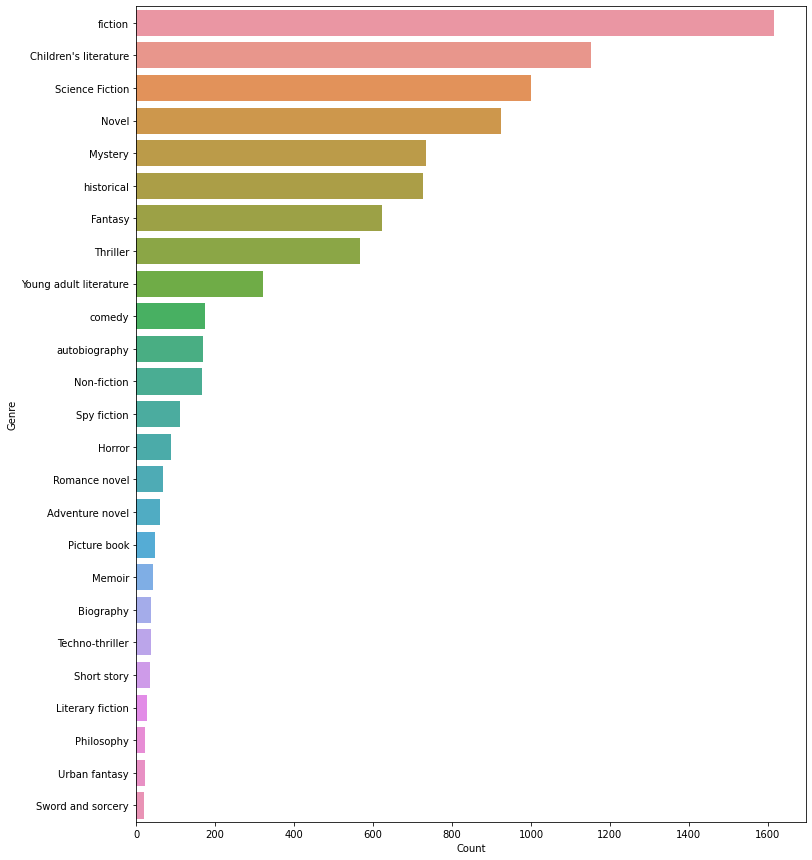

In [33]:
import nltk as nltk
import seaborn as sns
import matplotlib.pyplot as plt
all_genres=df.Genres.value_counts()
all_genres = nltk.FreqDist(df.Genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Genre') 
plt.show()

## Conclusions (As of now)

- Uneven distribution of data among different genres available in dataset
- Few genres have high volume of records
- Rest of the genres have very less data

## Performing Data Augmentation

In [34]:
import random
from random import shuffle
import nltk
## uncomment code below to download NLTK wordnet in your python
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
## uncomment code below to download NLTK wordnet in your python
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            #print("replaced", random_word, "with", synonym)
            num_replaced += 1
        if num_replaced >= n: #only replace up to n words
            break

    #this is stupid but we need it, trust me
    sentence = ' '.join(new_words)
    new_words = sentence.split(' ')

    return new_words

In [36]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

In [37]:
synonym_replacement(['hello','pretty','ugly','cloud','both','how'],3)

['how', 'do', 'you', 'do', 'pretty', 'wretched', 'swarm', 'both', 'how']

In [38]:
glist2=[
    "Horror",
    "Romance novel",
    "Adventure novel",
    "Picture book",
    "Memoir",
    "Biography",
    "Techno-thriller",
    "Short story",
    "Literary fiction",
    "Philosophy",
    "Urban fantasy",
    "Sword and sorcery"
]

glist3=[
    'comedy',
    'autobiography',
    'Non-fiction',
    'Spy fiction'
]

glist4=[
    'Young adult literature',
     'Mystery',
     'historical',
     'Fantasy',
     'Thriller'
]

In [39]:
## uncomment code below to download NLTK wordnet in your python
nltk.download("punkt")
from nltk.tokenize import word_tokenize
def applysynonym(row):
    words=word_tokenize(row)
    n=len(words)
    res=synonym_replacement(words,n//10)
    return ' '.join(res)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
def augmentdata(g,n):
    global df
    temp=df[df.Genres==g]
    temp1=temp
    for i in range(n):
        temp1.Summary=temp.Summary.apply(applysynonym)
        df=df.append(temp1,ignore_index=True)
    return

In [41]:
#augmenting different genres different number of times so that overall distribution is even
from tqdm import tqdm
for g in glist2:
    augmentdata(g,10)

for g in tqdm(glist3):
    augmentdata(g,8)

for g in tqdm(glist4):
    augmentdata(g,1)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
100%|██████████| 5/5 [00:32<00:00,  6.48s/it]


In [42]:
df

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
1,6,A Wizard of Earthsea,Children's literature,"Ged is a young boy on Gont, one of the larger..."
2,8,Blade Runner 3: Replicant Night,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
3,9,Blade Runner 2: The Edge of Human,Science Fiction,Beginning several months after the events in ...
4,21,Children of Dune,Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...
21864,16414,Carver,Thriller,"The central character , Samuel Carver , is an ..."
21865,16442,Rabies,Thriller,"seth in betimes 1980s , during the height of i..."
21866,16542,The Bourne Imperative,Thriller,: For a more detailed background of the main c...
21867,16551,Remote Control,Thriller,The series follows the character of Nick Stone...


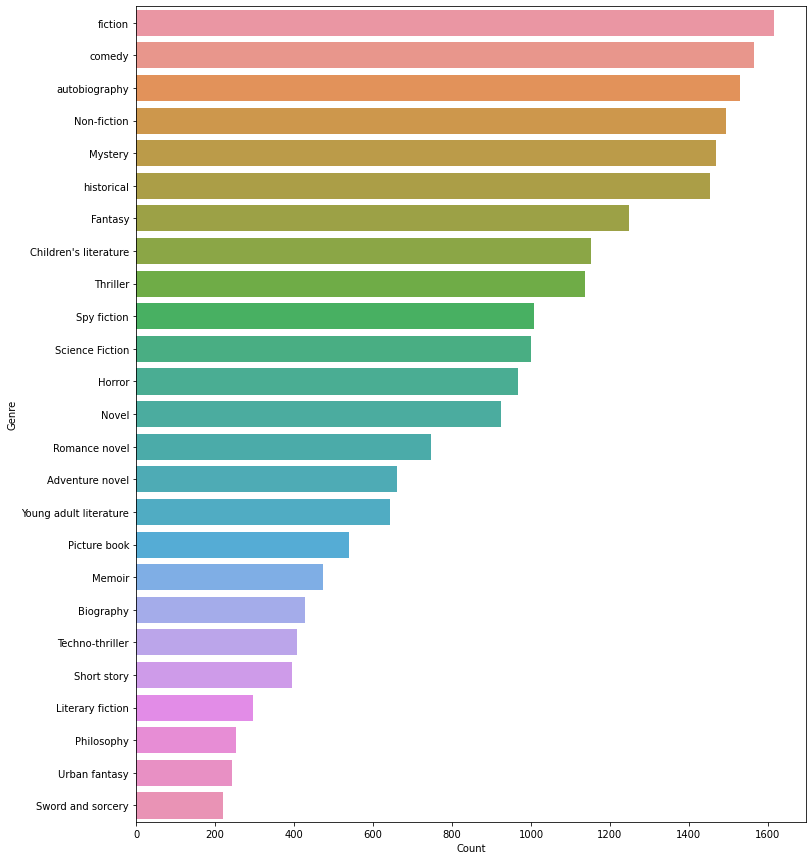

In [43]:
all_genres=df.Genres.value_counts()
all_genres = nltk.FreqDist(df.Genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Genre') 
plt.show()

In [44]:
df.Genres.value_counts()

fiction                   1615
comedy                    1566
autobiography             1530
Non-fiction               1494
Mystery                   1468
historical                1454
Fantasy                   1248
Children's literature     1152
Thriller                  1136
Spy fiction               1008
Science Fiction            999
Horror                     968
Novel                      925
Romance novel              748
Adventure novel            660
Young adult literature     642
Picture book               539
Memoir                     473
Biography                  429
Techno-thriller            407
Short story                396
Literary fiction           297
Philosophy                 253
Urban fantasy              242
Sword and sorcery          220
Name: Genres, dtype: int64

## Data Cleaning

In [45]:
def remove_stopwords(data):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(str(data))
    
    filtered_data = ""
    
    for w in word_tokens:
        if w not in stop_words and len(w)>1:
            filtered_data=filtered_data+" "+w
    return filtered_data

In [46]:
import numpy as np
def remove_punctuation(data):
    marks="~!@#$%^&*()_+=-`[]\;'./{}|:<>?""'\n"
    
    for i in marks:
        data=np.char.replace(data,i,' ')
        data=np.char.replace(data,"  "," ")
    
    data=np.char.replace(data,",",'')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [53]:
from num2words import num2words
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [54]:
def preprocesswithoutstem(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)

    data = remove_punctuation(data)

    data = convert_numbers(data)
    
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    
    return data

In [55]:
dfWithoutStem = df.copy()

In [56]:
dfWithoutStem.Summary=dfWithoutStem.Summary.apply(preprocesswithoutstem)
dfWithoutStem

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...
21864,16414,Carver,Thriller,central character samuel carver ex assassin s...
21865,16442,Rabies,Thriller,seth betimes 1980s height insensate war novel...
21866,16542,The Bourne Imperative,Thriller,detailed background main character see jason ...
21867,16551,Remote Control,Thriller,series follows character nick stone ex milita...


In [59]:
dfWithoutStem.to_csv('augmentedDataWithoutStemming.csv')

In [60]:
from nltk import PorterStemmer
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    
    return new_text

In [61]:
def preprocesswithstem(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)
    
    data = stemming(data)
    
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

In [62]:
dfWithStem = df.copy()

In [63]:
dfWithStem.Summary=dfWithStem.Summary.apply(preprocesswithstem)
dfWithStem

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,alex teenag live near futur england lead gang...
1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger island north ar...
2,8,Blade Runner 3: Replicant Night,Science Fiction,live mar deckard act consult movi crew film s...
3,9,Blade Runner 2: The Edge of Human,Science Fiction,begin sever month event blade runner deckard ...
4,21,Children of Dune,Science Fiction,nine year emperor paul muad dib walk desert b...
...,...,...,...,...
21864,16414,Carver,Thriller,central charact samuel carver ex assassin sto...
21865,16442,Rabies,Thriller,seth betim one thousand nine hundr eighti hei...
21866,16542,The Bourne Imperative,Thriller,detail background main charact see jason bour...
21867,16551,Remote Control,Thriller,seri follow charact nick stone ex militari ma...


In [65]:
dfWithStem.to_csv('augmentedDataWithStemming.csv')